In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import requests

In [2]:
train = pd.read_csv('academic_data.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
sub = pd.read_csv('sample_submission.csv')

In [5]:
train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,1
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,2
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,2
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,3
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,1


In [6]:
pd.set_option('display.max_columns',None)

In [7]:
train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,1
1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,2
2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,2
3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,3
4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,1


In [8]:
test.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,1,2,3,152.1,0,0,0,0,0,0,18,0,0,7,0,0,0.000000,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,19,4,5,116.5,0,0,0,1,0,0,19,0,0,6,7,6,14.857143,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,19,4,9,114.2,0,0,0,1,0,1,18,0,0,6,11,6,12.000000,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,19,3,3,130.0,0,0,0,1,0,1,23,0,2,6,15,5,11.500000,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,37,5,5,106.0,1,0,0,1,0,0,26,0,0,6,9,3,11.000000,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


In [9]:
test.drop(columns=['id'],inplace = True)

In [10]:
test.shape

(51012, 36)

In [11]:
train.shape

(76518, 37)

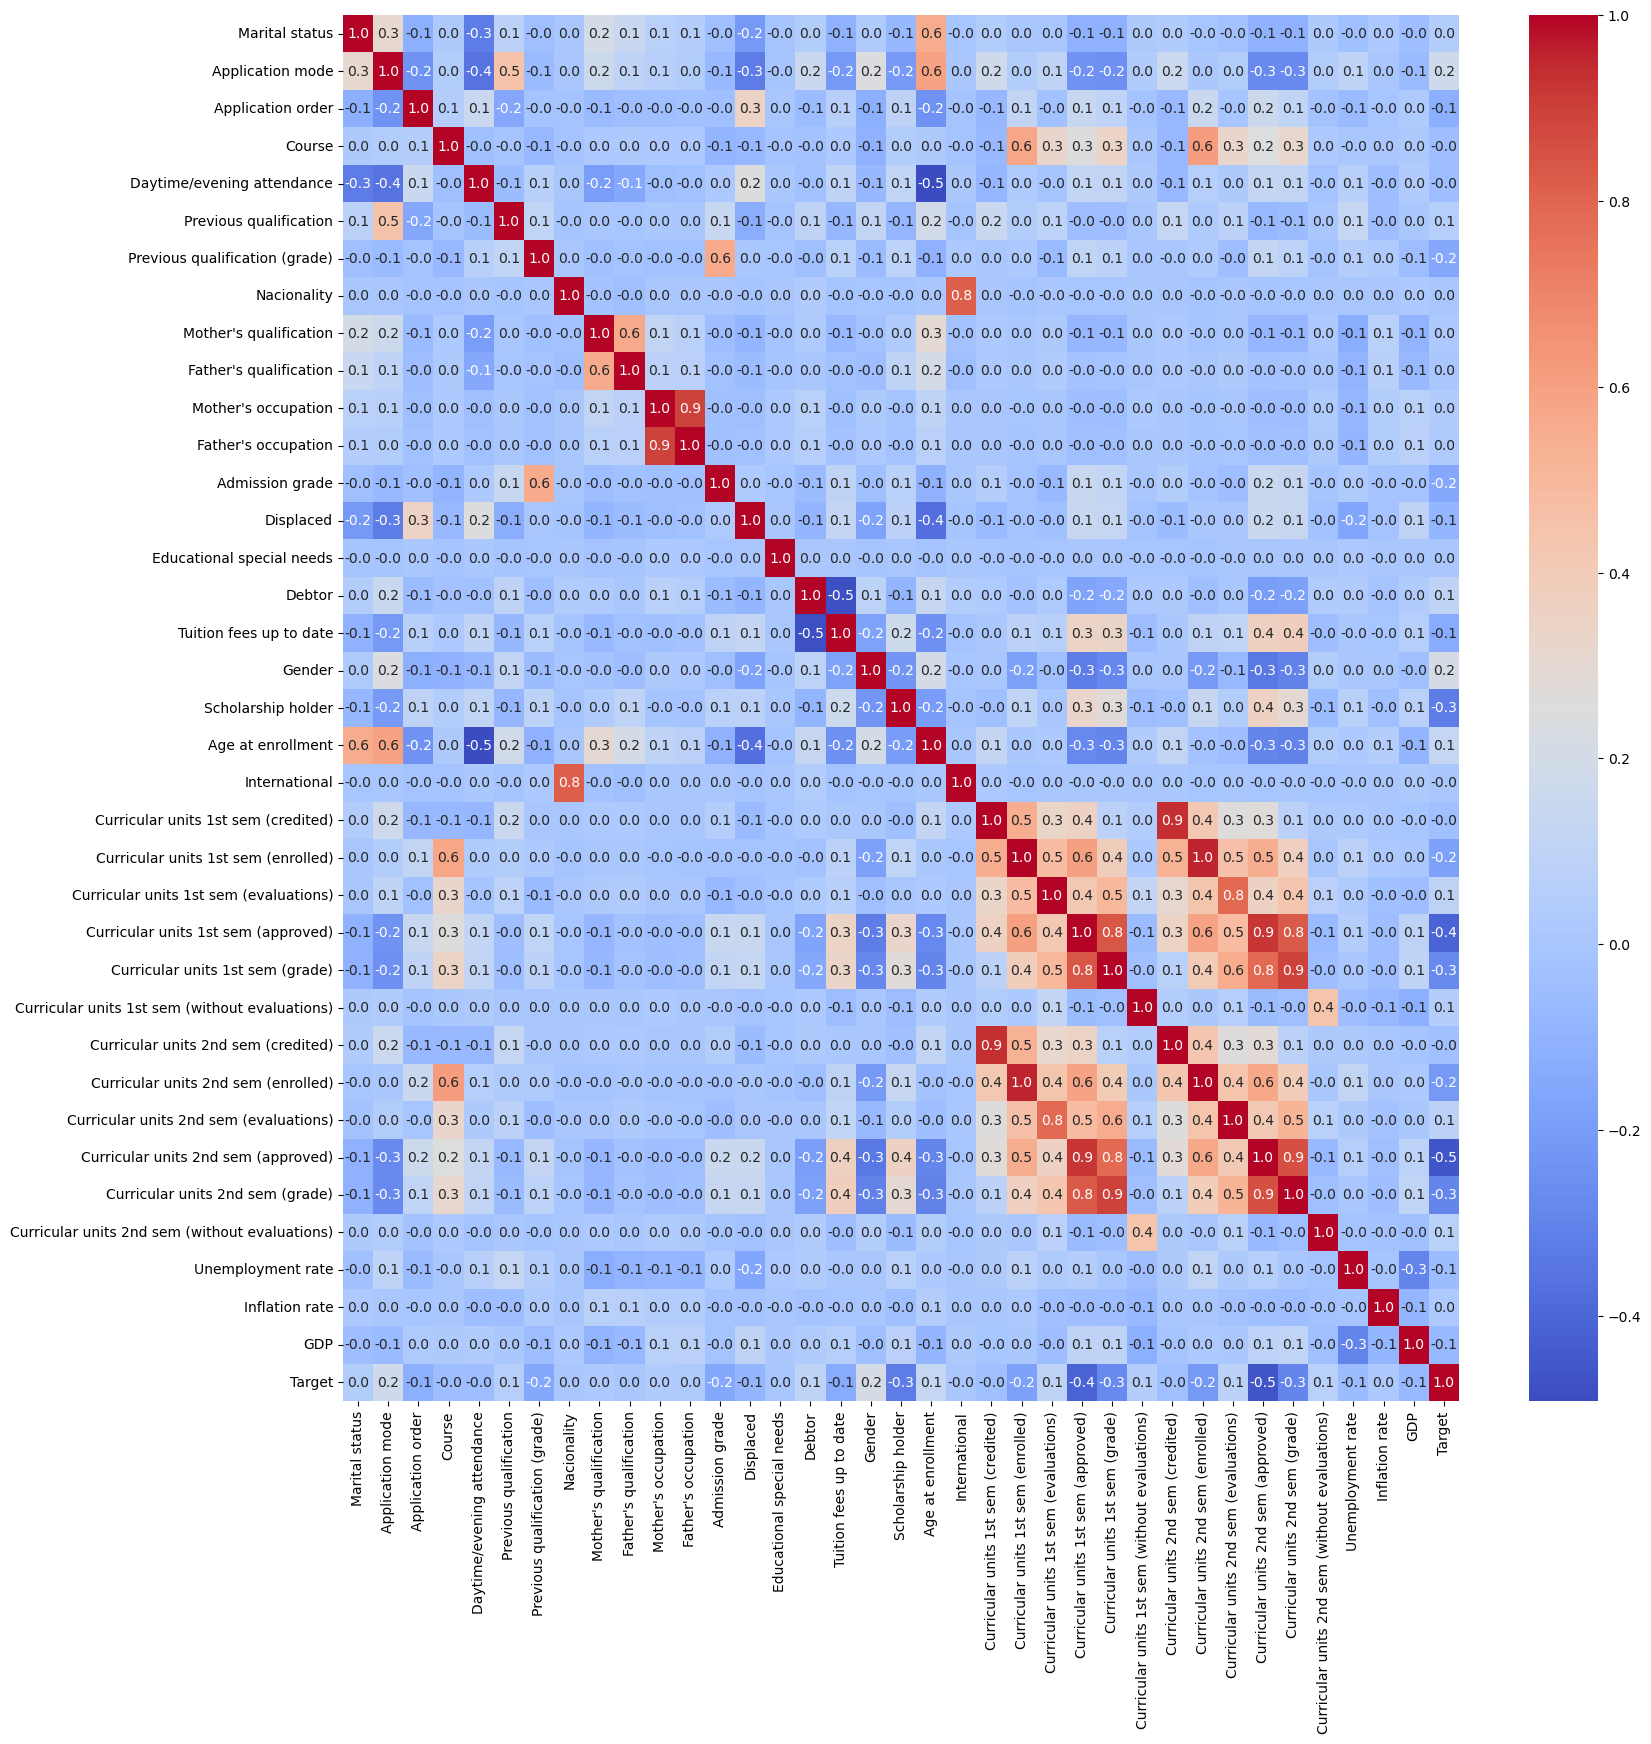

In [12]:
corr_matrix = train.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.show()

In [13]:
train.corr()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,1.000000,0.307324,-0.113951,0.023141,-0.323587,0.084064,-0.037717,0.004660,0.198373,0.144820,0.069695,0.054671,-0.037388,-0.216122,-0.011644,0.049145,-0.110193,0.031700,-0.075632,0.552404,-0.004286,0.039838,0.007968,0.008848,-0.107198,-0.104684,0.023511,0.037268,-0.005177,-0.021254,-0.111369,-0.111216,0.025689,-0.034481,0.019523,-0.046165,0.047468
Application mode,0.307324,1.000000,-0.238497,0.040452,-0.354834,0.451252,-0.060636,0.005937,0.163590,0.102086,0.063062,0.045628,-0.071243,-0.323343,-0.012460,0.153215,-0.216764,0.240312,-0.209330,0.593664,0.005971,0.174309,0.045741,0.101746,-0.246015,-0.248152,0.033103,0.159977,0.013383,0.047992,-0.274728,-0.271664,0.043298,0.098439,0.005130,-0.065964,0.178354
Application order,-0.113951,-0.238497,1.000000,0.054168,0.147153,-0.155281,-0.013956,-0.016601,-0.062138,-0.046074,-0.037192,-0.029156,-0.035714,0.347966,0.006566,-0.059187,0.064854,-0.122433,0.092768,-0.240258,-0.016731,-0.073493,0.109712,-0.029603,0.143060,0.097291,-0.018316,-0.066853,0.150224,-0.005080,0.166433,0.106326,-0.019871,-0.066022,-0.004206,0.031860,-0.113817
Course,0.023141,0.040452,0.054168,1.000000,-0.041557,-0.011349,-0.069488,-0.018786,0.018063,0.022939,0.015827,0.015646,-0.089969,-0.070575,-0.014631,-0.020765,0.016522,-0.106512,0.041961,0.023751,-0.015163,-0.067790,0.576324,0.327168,0.259981,0.344706,0.012660,-0.066453,0.613658,0.328303,0.249484,0.316896,0.018007,-0.001982,0.007152,0.024719,-0.048335
Daytime/evening attendance,-0.323587,-0.354834,0.147153,-0.041557,1.000000,-0.057775,0.067332,0.006357,-0.199593,-0.147777,-0.040206,-0.028313,0.016647,0.243796,0.013246,-0.028341,0.099552,-0.076996,0.105424,-0.491393,0.009799,-0.079284,0.031252,-0.007957,0.115550,0.110273,0.023854,-0.071575,0.059326,0.023615,0.120979,0.110837,-0.014665,0.063861,-0.045270,0.037908,-0.048478
Previous qualification,0.084064,0.451252,-0.155281,-0.011349,-0.057775,1.000000,0.105284,-0.010346,0.001252,-0.002976,0.011864,0.005876,0.143382,-0.127597,-0.009546,0.094983,-0.077692,0.112779,-0.081351,0.186887,-0.008985,0.150673,0.048382,0.085854,-0.044195,-0.046646,0.003897,0.128899,0.027733,0.080597,-0.069113,-0.059210,0.001979,0.130838,-0.046189,0.013527,0.056724
Previous qualification (grade),-0.037717,-0.060636,-0.013956,-0.069488,0.067332,0.105284,1.000000,0.007707,-0.034497,-0.014052,-0.026451,-0.025917,0.561483,0.008187,-0.003748,-0.041269,0.073557,-0.060188,0.085385,-0.106581,0.015825,0.000223,0.017958,-0.061582,0.104006,0.079656,0.000599,-0.000320,0.030076,-0.048591,0.121827,0.089353,-0.011397,0.052112,0.028678,-0.053731,-0.152562
Nacionality,0.004660,0.005937,-0.016601,-0.018786,0.006357,-0.010346,0.007707,1.000000,-0.024836,-0.040848,0.005132,0.004944,-0.001429,-0.012904,0.001591,0.034452,-0.012721,-0.006142,-0.008791,0.004282,0.816937,0.006494,-0.009031,-0.000647,-0.007438,-0.007060,0.010347,0.006125,-0.012356,-0.000051,-0.008279,-0.005232,0.002579,0.001823,0.001536,0.020058,0.003061
Mother's qualification,0.198373,0.163590,-0.062138,0.018063,-0.199593,0.001252,-0.034497,-0.024836,1.000000,0.567457,0.109717,0.068012,-0.048386,-0.086488,-0.015821,0.028476,-

In [14]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [15]:








len(correlation(train,0.7))

8

In [16]:
correlation(train,0.7)

{'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (grade)',
 "Father's occupation",
 'International'}

In [17]:
len(correlation(test,0.7))

8

In [18]:
corr_features = correlation(test, 0.7)
len(set(corr_features))

8

In [19]:
test.drop(corr_features,axis=1,inplace=True)

In [20]:
train.drop(corr_features,axis=1,inplace=True)

In [21]:
train.shape

(76518, 29)

In [22]:
test.shape

(51012, 28)

In [23]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [24]:
train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,9238,1,1,126.0,1,1,19,5,122.6,0,0,0,1,0,1,18,0,6,6,6,0,0,11.1,0.6,2.02,1
1,1,17,1,9238,1,1,125.0,1,19,19,9,119.8,1,0,0,1,0,0,18,0,6,8,4,0,0,11.1,0.6,2.02,2
2,1,17,2,9254,1,1,137.0,1,3,19,2,144.7,0,0,0,1,1,0,18,0,6,0,0,0,0,16.2,0.3,-0.92,2
3,1,1,3,9500,1,1,131.0,1,19,3,3,126.1,1,0,0,1,0,1,18,0,7,9,7,0,0,11.1,0.6,2.02,3
4,1,1,2,9500,1,1,132.0,1,19,37,4,120.1,1,0,0,1,0,0,18,0,7,12,6,0,0,7.6,2.6,0.32,1


In [25]:
train['Course'].value_counts()

9500    12074
9773     8214
9238     7935
9147     7741
9254     5425
9085     5373
9670     4760
9991     4057
9003     3733
9070     3281
9853     3198
9119     3004
171      2859
8014     2438
9130     1606
9556      746
33         72
979         1
39          1
Name: Course, dtype: int64

In [26]:
x = train.drop(columns=['Target'],axis = 1)
y = train['Target']

In [27]:
# x_train,x_val,y_train,y_val = train_test_split(x,y,random_state=9,test_size=0.24)

In [29]:
# print(x_train.shape)
# print(x_val.shape)
# print(y_train.shape)
# print(y_val.shape)

In [30]:
x

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,1,9238,1,1,126.0,1,1,19,5,122.6,0,0,0,1,0,1,18,0,6,6,6,0,0,11.1,0.6,2.02
1,1,17,1,9238,1,1,125.0,1,19,19,9,119.8,1,0,0,1,0,0,18,0,6,8,4,0,0,11.1,0.6,2.02
2,1,17,2,9254,1,1,137.0,1,3,19,2,144.7,0,0,0,1,1,0,18,0,6,0,0,0,0,16.2,0.3,-0.92
3,1,1,3,9500,1,1,131.0,1,19,3,3,126.1,1,0,0,1,0,1,18,0,7,9,7,0,0,11.1,0.6,2.02
4,1,1,2,9500,1,1,132.0,1,19,37,4,120.1,1,0,0,1,0,0,18,0,7,12,6,0,0,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1,17,1,9254,1,1,121.0,1,19,1,7,116.5,1,0,0,1,0,1,18,0,6,9,6,0,0,13.9,-0.3,0.79
76514,1,1,6,9254,1,1,125.0,1,1,38,4,131.6,1,0,0,1,0,0,19,0,6,22,4,0,0,9.4,-0.8,-3.12
76515,5,17,1,9085,1,1,138.0,1,37,37,9,123.3,1,0,0,1,0,0,19,0,5,13,4,2,1,9.4,-0.8,-3.12
76516,1,1,3,9070,1,1,136.0,1,38,37,5,124.8,1,0,0,1,0,0,18,0,6,0,0,0,0,7.6,2.6,0.32


In [31]:
y

0        1
1        2
2        2
3        3
4        1
        ..
76513    1
76514    1
76515    3
76516    2
76517    1
Name: Target, Length: 76518, dtype: int64

In [32]:
test

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,1,9500,1,1,141.0,1,3,1,2,152.1,0,0,0,0,0,0,18,0,7,0,0,0,0,13.9,-0.3,0.79
1,1,1,1,9238,1,1,128.0,1,1,19,4,116.5,0,0,0,1,0,0,19,0,6,7,6,0,0,11.1,0.6,2.02
2,1,1,1,9238,1,1,118.0,1,1,19,4,114.2,0,0,0,1,0,1,18,0,6,11,6,0,0,15.5,2.8,-4.06
3,1,44,1,9147,1,39,130.0,1,1,19,3,130.0,0,0,0,1,0,1,23,2,6,15,5,0,0,8.9,1.4,3.51
4,1,39,1,9670,1,1,110.0,1,1,37,5,106.0,1,0,0,1,0,0,26,0,6,9,3,0,2,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,1,1,2,171,1,1,128.0,1,38,37,7,124.7,1,0,0,1,0,0,19,0,0,0,0,0,0,15.5,2.8,-4.06
51008,2,39,1,9119,1,19,133.1,1,19,37,9,140.0,0,0,1,0,1,0,33,0,5,6,0,0,0,9.4,-0.8,-3.12
51009,1,1,1,171,1,1,127.0,1,1,1,4,120.4,0,0,1,0,0,0,20,0,0,0,0,0,0,15.5,2.8,-4.06
51010,1,1,3,9773,1,1,132.0,1,19,19,5,126.3,1,0,1,0,0,0,18,0,6,8,5,0,0,7.6,2.6,0.32


## model 1  logistic regression


In [33]:
log = LogisticRegression(max_iter=20000,solver='newton-cg',fit_intercept=False,dual=False,l1_ratio=1,)
log.fit(x,y)

C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


LogisticRegression(fit_intercept=False, l1_ratio=1, max_iter=20000,
                   solver='newton-cg')

In [34]:
log.predict(test)

array([2, 1, 1, ..., 2, 2, 2], dtype=int64)

In [35]:
accuracy_score(y,log.predict(test))*100

ValueError: Found input variables with inconsistent numbers of samples: [76518, 51012]

## model 2 gradient boosting

In [189]:
grad = GradientBoostingClassifier(learning_rate=0.1)
grad.fit(x_train_scaled,y_train)

GradientBoostingClassifier()

In [190]:
grad.predict(x_val_scaled)

array([2, 2, 3, ..., 1, 1, 1], dtype=int64)

In [191]:
accuracy_score(y_val,grad.predict(x_val_scaled))*100

80.01089028042472

In [141]:
grad.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

## model 3 HistgraHistGradientBoostingClassifier

In [186]:
hisgrad = HistGradientBoostingClassifier(early_stopping=70,random_state=9,loss='categorical_crossentropy',scoring='accuracy'
                                        ,max_iter=5000,l2_regularization=0.25)
hisgrad.fit(x_train_scaled,y_train)

C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\ensemble\_hist_gradient_boosting\gradient_boosting.py:1998: FutureWarning: The loss 'categorical_crossentropy' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.
  warnings.warn(


HistGradientBoostingClassifier(early_stopping=70, l2_regularization=0.25,
                               loss='categorical_crossentropy', max_iter=5000,
                               random_state=9, scoring='accuracy')

In [187]:
grad.predict(x_val_scaled)

array([2, 2, 3, ..., 1, 1, 1], dtype=int64)

In [188]:
accuracy_score(y_val,hisgrad.predict(x_val_scaled))*100

80.31037299210455

In [159]:
hisgrad.get_params()

{'categorical_features': None,
 'class_weight': None,
 'early_stopping': 100,
 'interaction_cst': None,
 'l2_regularization': 0.0,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_bins': 255,
 'max_depth': None,
 'max_iter': 100,
 'max_leaf_nodes': 31,
 'min_samples_leaf': 20,
 'monotonic_cst': None,
 'n_iter_no_change': 10,
 'random_state': None,
 'scoring': 'loss',
 'tol': 1e-07,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


## catboost

In [251]:
params = {
    'nan_mode': 'Min',
    'eval_metric': 'MultiClass',
    'iterations': 2000,  # Increased from 1500 to 2000
    'sampling_frequency': 'PerTree',
    'leaf_estimation_method': 'Newton',
    'random_score_type': 'NormalWithModelSizeDecrease',
    'grow_policy': 'SymmetricTree',
    'penalties_coefficient': 1,
    'boosting_type': 'Ordered',  # Changed from 'Plain' to 'Ordered'
    'model_shrink_mode': 'Constant',
    'feature_border_type': 'GreedyLogSum',
#     'bayesian_matrix_reg': 0.1,
    'eval_fraction': 0,
#     'force_unit_auto_pair_weights': False,
    'l2_leaf_reg': 5,  # Increased from 3 to 5
    'random_strength': 1,
    'rsm': 1,
    'boost_from_average': False,
    'model_size_reg': 0.5,
#     'pool_metainfo_options': {'tags': {}},
#     'use_best_model': True,  # Changed from False to True
    'class_names': [1, 2, 3],
    'random_seed': 42,  # Changed from 0 to 42 for reproducibility
    'depth': 8,  # Increased from 6 to 8
}

cat = CatBoostClassifier(**params)
cat.fit(x_train_scaled, y_train)


0:	learn: 1.0685143	total: 346ms	remaining: 11m 31s
1:	learn: 1.0413298	total: 739ms	remaining: 12m 17s
2:	learn: 1.0153248	total: 1.07s	remaining: 11m 55s
3:	learn: 0.9915819	total: 1.41s	remaining: 11m 41s
4:	learn: 0.9686171	total: 1.73s	remaining: 11m 29s
5:	learn: 0.9480661	total: 2.07s	remaining: 11m 27s
6:	learn: 0.9286033	total: 2.42s	remaining: 11m 28s
7:	learn: 0.9104419	total: 2.75s	remaining: 11m 24s
8:	learn: 0.8932785	total: 3.07s	remaining: 11m 19s
9:	learn: 0.8771406	total: 3.38s	remaining: 11m 12s
10:	learn: 0.8615495	total: 3.67s	remaining: 11m 4s
11:	learn: 0.8469700	total: 4.01s	remaining: 11m 4s
12:	learn: 0.8331423	total: 4.3s	remaining: 10m 57s
13:	learn: 0.8200665	total: 4.63s	remaining: 10m 56s
14:	learn: 0.8076475	total: 4.97s	remaining: 10m 57s
15:	learn: 0.7965044	total: 5.33s	remaining: 11m
16:	learn: 0.7853345	total: 5.63s	remaining: 10m 56s
17:	learn: 0.7752951	total: 5.93s	remaining: 10m 53s
18:	learn: 0.7653088	total: 6.25s	remaining: 10m 51s
19:	learn:

156:	learn: 0.5197930	total: 49.9s	remaining: 9m 46s
157:	learn: 0.5196185	total: 50.3s	remaining: 9m 46s
158:	learn: 0.5194057	total: 50.6s	remaining: 9m 45s
159:	learn: 0.5191825	total: 50.9s	remaining: 9m 45s
160:	learn: 0.5190215	total: 51.2s	remaining: 9m 45s
161:	learn: 0.5189051	total: 51.5s	remaining: 9m 44s
162:	learn: 0.5186777	total: 51.8s	remaining: 9m 44s
163:	learn: 0.5184704	total: 52.2s	remaining: 9m 43s
164:	learn: 0.5183839	total: 52.5s	remaining: 9m 43s
165:	learn: 0.5182232	total: 52.8s	remaining: 9m 43s
166:	learn: 0.5180615	total: 53.1s	remaining: 9m 42s
167:	learn: 0.5179118	total: 53.4s	remaining: 9m 42s
168:	learn: 0.5177540	total: 53.7s	remaining: 9m 41s
169:	learn: 0.5175976	total: 54s	remaining: 9m 41s
170:	learn: 0.5174731	total: 54.3s	remaining: 9m 41s
171:	learn: 0.5172653	total: 54.7s	remaining: 9m 41s
172:	learn: 0.5170976	total: 55s	remaining: 9m 41s
173:	learn: 0.5169997	total: 55.4s	remaining: 9m 40s
174:	learn: 0.5168335	total: 55.7s	remaining: 9m 4

310:	learn: 0.5028366	total: 1m 38s	remaining: 8m 52s
311:	learn: 0.5027710	total: 1m 38s	remaining: 8m 52s
312:	learn: 0.5027350	total: 1m 38s	remaining: 8m 51s
313:	learn: 0.5026583	total: 1m 39s	remaining: 8m 51s
314:	learn: 0.5026247	total: 1m 39s	remaining: 8m 51s
315:	learn: 0.5025036	total: 1m 39s	remaining: 8m 51s
316:	learn: 0.5024320	total: 1m 39s	remaining: 8m 50s
317:	learn: 0.5024109	total: 1m 40s	remaining: 8m 49s
318:	learn: 0.5022601	total: 1m 40s	remaining: 8m 49s
319:	learn: 0.5021962	total: 1m 40s	remaining: 8m 48s
320:	learn: 0.5021656	total: 1m 41s	remaining: 8m 48s
321:	learn: 0.5020852	total: 1m 41s	remaining: 8m 48s
322:	learn: 0.5020235	total: 1m 41s	remaining: 8m 47s
323:	learn: 0.5019626	total: 1m 42s	remaining: 8m 47s
324:	learn: 0.5018502	total: 1m 42s	remaining: 8m 47s
325:	learn: 0.5017911	total: 1m 42s	remaining: 8m 47s
326:	learn: 0.5017322	total: 1m 42s	remaining: 8m 46s
327:	learn: 0.5016771	total: 1m 43s	remaining: 8m 46s
328:	learn: 0.5015993	total:

463:	learn: 0.4929530	total: 2m 25s	remaining: 8m 2s
464:	learn: 0.4928793	total: 2m 25s	remaining: 8m 1s
465:	learn: 0.4927993	total: 2m 26s	remaining: 8m 1s
466:	learn: 0.4927508	total: 2m 26s	remaining: 8m 1s
467:	learn: 0.4926532	total: 2m 26s	remaining: 8m
468:	learn: 0.4925578	total: 2m 27s	remaining: 8m
469:	learn: 0.4925054	total: 2m 27s	remaining: 8m
470:	learn: 0.4924330	total: 2m 27s	remaining: 8m
471:	learn: 0.4923725	total: 2m 28s	remaining: 7m 59s
472:	learn: 0.4922565	total: 2m 28s	remaining: 7m 59s
473:	learn: 0.4921986	total: 2m 28s	remaining: 7m 59s
474:	learn: 0.4921690	total: 2m 29s	remaining: 7m 58s
475:	learn: 0.4921188	total: 2m 29s	remaining: 7m 58s
476:	learn: 0.4920430	total: 2m 29s	remaining: 7m 58s
477:	learn: 0.4919737	total: 2m 30s	remaining: 7m 58s
478:	learn: 0.4919107	total: 2m 30s	remaining: 7m 57s
479:	learn: 0.4918336	total: 2m 30s	remaining: 7m 57s
480:	learn: 0.4917802	total: 2m 31s	remaining: 7m 57s
481:	learn: 0.4917375	total: 2m 31s	remaining: 7

616:	learn: 0.4856351	total: 3m 14s	remaining: 7m 14s
617:	learn: 0.4855851	total: 3m 14s	remaining: 7m 14s
618:	learn: 0.4855601	total: 3m 14s	remaining: 7m 14s
619:	learn: 0.4855040	total: 3m 15s	remaining: 7m 14s
620:	learn: 0.4854787	total: 3m 15s	remaining: 7m 13s
621:	learn: 0.4854144	total: 3m 15s	remaining: 7m 13s
622:	learn: 0.4853848	total: 3m 16s	remaining: 7m 13s
623:	learn: 0.4853421	total: 3m 16s	remaining: 7m 13s
624:	learn: 0.4853158	total: 3m 16s	remaining: 7m 12s
625:	learn: 0.4852874	total: 3m 17s	remaining: 7m 12s
626:	learn: 0.4852485	total: 3m 17s	remaining: 7m 12s
627:	learn: 0.4852013	total: 3m 17s	remaining: 7m 11s
628:	learn: 0.4851769	total: 3m 18s	remaining: 7m 11s
629:	learn: 0.4851447	total: 3m 18s	remaining: 7m 11s
630:	learn: 0.4850865	total: 3m 18s	remaining: 7m 10s
631:	learn: 0.4850517	total: 3m 18s	remaining: 7m 10s
632:	learn: 0.4850317	total: 3m 19s	remaining: 7m 10s
633:	learn: 0.4850036	total: 3m 19s	remaining: 7m 9s
634:	learn: 0.4849429	total: 

769:	learn: 0.4803088	total: 4m 2s	remaining: 6m 27s
770:	learn: 0.4802451	total: 4m 2s	remaining: 6m 27s
771:	learn: 0.4802100	total: 4m 3s	remaining: 6m 26s
772:	learn: 0.4801779	total: 4m 3s	remaining: 6m 26s
773:	learn: 0.4801473	total: 4m 3s	remaining: 6m 26s
774:	learn: 0.4801267	total: 4m 4s	remaining: 6m 25s
775:	learn: 0.4800996	total: 4m 4s	remaining: 6m 25s
776:	learn: 0.4800844	total: 4m 4s	remaining: 6m 25s
777:	learn: 0.4800404	total: 4m 5s	remaining: 6m 25s
778:	learn: 0.4799827	total: 4m 5s	remaining: 6m 24s
779:	learn: 0.4799607	total: 4m 5s	remaining: 6m 24s
780:	learn: 0.4799294	total: 4m 6s	remaining: 6m 24s
781:	learn: 0.4799187	total: 4m 6s	remaining: 6m 23s
782:	learn: 0.4799055	total: 4m 6s	remaining: 6m 23s
783:	learn: 0.4798646	total: 4m 6s	remaining: 6m 23s
784:	learn: 0.4798040	total: 4m 7s	remaining: 6m 22s
785:	learn: 0.4797675	total: 4m 7s	remaining: 6m 22s
786:	learn: 0.4797446	total: 4m 7s	remaining: 6m 22s
787:	learn: 0.4797275	total: 4m 8s	remaining: 

922:	learn: 0.4756273	total: 4m 50s	remaining: 5m 39s
923:	learn: 0.4756027	total: 4m 50s	remaining: 5m 38s
924:	learn: 0.4756022	total: 4m 51s	remaining: 5m 38s
925:	learn: 0.4755500	total: 4m 51s	remaining: 5m 37s
926:	learn: 0.4755354	total: 4m 51s	remaining: 5m 37s
927:	learn: 0.4755076	total: 4m 52s	remaining: 5m 37s
928:	learn: 0.4754428	total: 4m 52s	remaining: 5m 36s
929:	learn: 0.4754057	total: 4m 52s	remaining: 5m 36s
930:	learn: 0.4753839	total: 4m 52s	remaining: 5m 36s
931:	learn: 0.4753448	total: 4m 53s	remaining: 5m 36s
932:	learn: 0.4753208	total: 4m 53s	remaining: 5m 35s
933:	learn: 0.4752728	total: 4m 53s	remaining: 5m 35s
934:	learn: 0.4752528	total: 4m 54s	remaining: 5m 35s
935:	learn: 0.4752071	total: 4m 54s	remaining: 5m 34s
936:	learn: 0.4752017	total: 4m 54s	remaining: 5m 34s
937:	learn: 0.4751793	total: 4m 55s	remaining: 5m 34s
938:	learn: 0.4751508	total: 4m 55s	remaining: 5m 33s
939:	learn: 0.4751143	total: 4m 55s	remaining: 5m 33s
940:	learn: 0.4750871	total:

1074:	learn: 0.4716091	total: 5m 38s	remaining: 4m 51s
1075:	learn: 0.4715860	total: 5m 38s	remaining: 4m 50s
1076:	learn: 0.4715453	total: 5m 39s	remaining: 4m 50s
1077:	learn: 0.4715104	total: 5m 39s	remaining: 4m 50s
1078:	learn: 0.4714799	total: 5m 39s	remaining: 4m 50s
1079:	learn: 0.4714444	total: 5m 40s	remaining: 4m 49s
1080:	learn: 0.4714346	total: 5m 40s	remaining: 4m 49s
1081:	learn: 0.4714203	total: 5m 40s	remaining: 4m 49s
1082:	learn: 0.4713813	total: 5m 41s	remaining: 4m 48s
1083:	learn: 0.4713632	total: 5m 41s	remaining: 4m 48s
1084:	learn: 0.4713271	total: 5m 41s	remaining: 4m 48s
1085:	learn: 0.4713151	total: 5m 41s	remaining: 4m 47s
1086:	learn: 0.4713001	total: 5m 42s	remaining: 4m 47s
1087:	learn: 0.4712953	total: 5m 42s	remaining: 4m 47s
1088:	learn: 0.4712699	total: 5m 42s	remaining: 4m 46s
1089:	learn: 0.4712408	total: 5m 43s	remaining: 4m 46s
1090:	learn: 0.4712192	total: 5m 43s	remaining: 4m 46s
1091:	learn: 0.4711766	total: 5m 43s	remaining: 4m 45s
1092:	lear

1225:	learn: 0.4678652	total: 6m 25s	remaining: 4m 3s
1226:	learn: 0.4678495	total: 6m 25s	remaining: 4m 2s
1227:	learn: 0.4678093	total: 6m 25s	remaining: 4m 2s
1228:	learn: 0.4677713	total: 6m 26s	remaining: 4m 2s
1229:	learn: 0.4677541	total: 6m 26s	remaining: 4m 2s
1230:	learn: 0.4677356	total: 6m 26s	remaining: 4m 1s
1231:	learn: 0.4677240	total: 6m 27s	remaining: 4m 1s
1232:	learn: 0.4676868	total: 6m 27s	remaining: 4m 1s
1233:	learn: 0.4676530	total: 6m 27s	remaining: 4m
1234:	learn: 0.4676368	total: 6m 28s	remaining: 4m
1235:	learn: 0.4676243	total: 6m 28s	remaining: 4m
1236:	learn: 0.4676146	total: 6m 28s	remaining: 3m 59s
1237:	learn: 0.4675886	total: 6m 28s	remaining: 3m 59s
1238:	learn: 0.4675581	total: 6m 29s	remaining: 3m 59s
1239:	learn: 0.4675531	total: 6m 29s	remaining: 3m 58s
1240:	learn: 0.4675414	total: 6m 29s	remaining: 3m 58s
1241:	learn: 0.4674748	total: 6m 30s	remaining: 3m 58s
1242:	learn: 0.4674424	total: 6m 30s	remaining: 3m 57s
1243:	learn: 0.4674317	total: 

1376:	learn: 0.4643520	total: 7m 13s	remaining: 3m 15s
1377:	learn: 0.4643171	total: 7m 13s	remaining: 3m 15s
1378:	learn: 0.4643141	total: 7m 13s	remaining: 3m 15s
1379:	learn: 0.4642857	total: 7m 13s	remaining: 3m 14s
1380:	learn: 0.4642702	total: 7m 14s	remaining: 3m 14s
1381:	learn: 0.4642643	total: 7m 14s	remaining: 3m 14s
1382:	learn: 0.4642533	total: 7m 14s	remaining: 3m 13s
1383:	learn: 0.4642405	total: 7m 15s	remaining: 3m 13s
1384:	learn: 0.4641995	total: 7m 15s	remaining: 3m 13s
1385:	learn: 0.4641712	total: 7m 15s	remaining: 3m 13s
1386:	learn: 0.4641625	total: 7m 16s	remaining: 3m 12s
1387:	learn: 0.4641028	total: 7m 16s	remaining: 3m 12s
1388:	learn: 0.4640415	total: 7m 16s	remaining: 3m 12s
1389:	learn: 0.4640097	total: 7m 17s	remaining: 3m 11s
1390:	learn: 0.4639961	total: 7m 17s	remaining: 3m 11s
1391:	learn: 0.4639892	total: 7m 17s	remaining: 3m 11s
1392:	learn: 0.4639829	total: 7m 17s	remaining: 3m 10s
1393:	learn: 0.4639466	total: 7m 18s	remaining: 3m 10s
1394:	lear

1526:	learn: 0.4612643	total: 7m 59s	remaining: 2m 28s
1527:	learn: 0.4612457	total: 7m 59s	remaining: 2m 28s
1528:	learn: 0.4612442	total: 8m	remaining: 2m 27s
1529:	learn: 0.4612317	total: 8m	remaining: 2m 27s
1530:	learn: 0.4611792	total: 8m	remaining: 2m 27s
1531:	learn: 0.4611689	total: 8m 1s	remaining: 2m 26s
1532:	learn: 0.4611601	total: 8m 1s	remaining: 2m 26s
1533:	learn: 0.4611232	total: 8m 1s	remaining: 2m 26s
1534:	learn: 0.4611019	total: 8m 2s	remaining: 2m 26s
1535:	learn: 0.4610841	total: 8m 2s	remaining: 2m 25s
1536:	learn: 0.4610765	total: 8m 2s	remaining: 2m 25s
1537:	learn: 0.4610684	total: 8m 3s	remaining: 2m 25s
1538:	learn: 0.4610445	total: 8m 3s	remaining: 2m 24s
1539:	learn: 0.4610388	total: 8m 3s	remaining: 2m 24s
1540:	learn: 0.4609906	total: 8m 4s	remaining: 2m 24s
1541:	learn: 0.4609880	total: 8m 4s	remaining: 2m 23s
1542:	learn: 0.4609801	total: 8m 4s	remaining: 2m 23s
1543:	learn: 0.4609639	total: 8m 4s	remaining: 2m 23s
1544:	learn: 0.4609376	total: 8m 5s

1677:	learn: 0.4581600	total: 8m 46s	remaining: 1m 41s
1678:	learn: 0.4581501	total: 8m 46s	remaining: 1m 40s
1679:	learn: 0.4581336	total: 8m 47s	remaining: 1m 40s
1680:	learn: 0.4580965	total: 8m 47s	remaining: 1m 40s
1681:	learn: 0.4580739	total: 8m 47s	remaining: 1m 39s
1682:	learn: 0.4580581	total: 8m 48s	remaining: 1m 39s
1683:	learn: 0.4580268	total: 8m 48s	remaining: 1m 39s
1684:	learn: 0.4580132	total: 8m 48s	remaining: 1m 38s
1685:	learn: 0.4580023	total: 8m 49s	remaining: 1m 38s
1686:	learn: 0.4579554	total: 8m 49s	remaining: 1m 38s
1687:	learn: 0.4579375	total: 8m 49s	remaining: 1m 37s
1688:	learn: 0.4579101	total: 8m 50s	remaining: 1m 37s
1689:	learn: 0.4578973	total: 8m 50s	remaining: 1m 37s
1690:	learn: 0.4578847	total: 8m 50s	remaining: 1m 36s
1691:	learn: 0.4578667	total: 8m 51s	remaining: 1m 36s
1692:	learn: 0.4578396	total: 8m 51s	remaining: 1m 36s
1693:	learn: 0.4578318	total: 8m 51s	remaining: 1m 36s
1694:	learn: 0.4578117	total: 8m 52s	remaining: 1m 35s
1695:	lear

1828:	learn: 0.4554142	total: 9m 33s	remaining: 53.6s
1829:	learn: 0.4553988	total: 9m 34s	remaining: 53.3s
1830:	learn: 0.4553740	total: 9m 34s	remaining: 53s
1831:	learn: 0.4553323	total: 9m 34s	remaining: 52.7s
1832:	learn: 0.4553322	total: 9m 34s	remaining: 52.4s
1833:	learn: 0.4552878	total: 9m 35s	remaining: 52.1s
1834:	learn: 0.4552620	total: 9m 35s	remaining: 51.8s
1835:	learn: 0.4552426	total: 9m 35s	remaining: 51.4s
1836:	learn: 0.4552272	total: 9m 36s	remaining: 51.1s
1837:	learn: 0.4551974	total: 9m 36s	remaining: 50.8s
1838:	learn: 0.4551887	total: 9m 36s	remaining: 50.5s
1839:	learn: 0.4551873	total: 9m 37s	remaining: 50.2s
1840:	learn: 0.4551797	total: 9m 37s	remaining: 49.9s
1841:	learn: 0.4551662	total: 9m 37s	remaining: 49.6s
1842:	learn: 0.4551579	total: 9m 38s	remaining: 49.2s
1843:	learn: 0.4551366	total: 9m 38s	remaining: 48.9s
1844:	learn: 0.4551015	total: 9m 38s	remaining: 48.6s
1845:	learn: 0.4550825	total: 9m 39s	remaining: 48.3s
1846:	learn: 0.4550619	total: 

1980:	learn: 0.4527999	total: 10m 20s	remaining: 5.95s
1981:	learn: 0.4527989	total: 10m 20s	remaining: 5.64s
1982:	learn: 0.4527856	total: 10m 21s	remaining: 5.32s
1983:	learn: 0.4527526	total: 10m 21s	remaining: 5.01s
1984:	learn: 0.4527518	total: 10m 21s	remaining: 4.7s
1985:	learn: 0.4527493	total: 10m 21s	remaining: 4.38s
1986:	learn: 0.4527387	total: 10m 22s	remaining: 4.07s
1987:	learn: 0.4527347	total: 10m 22s	remaining: 3.76s
1988:	learn: 0.4527277	total: 10m 22s	remaining: 3.44s
1989:	learn: 0.4526715	total: 10m 23s	remaining: 3.13s
1990:	learn: 0.4526633	total: 10m 23s	remaining: 2.82s
1991:	learn: 0.4525947	total: 10m 23s	remaining: 2.5s
1992:	learn: 0.4525912	total: 10m 24s	remaining: 2.19s
1993:	learn: 0.4525639	total: 10m 24s	remaining: 1.88s
1994:	learn: 0.4525485	total: 10m 24s	remaining: 1.56s
1995:	learn: 0.4524952	total: 10m 25s	remaining: 1.25s
1996:	learn: 0.4524912	total: 10m 25s	remaining: 939ms
1997:	learn: 0.4524854	total: 10m 25s	remaining: 626ms
1998:	learn:

In [252]:
cat.predict(x_val_scaled)

array([[2],
       [2],
       [3],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [253]:
accuracy_score(y_val,cat.predict(x_val_scaled))*100

80.75142934930575

In [204]:
cat.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'MultiClass',
 'iterations': 1500,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'use_best_model': False,
 'class_names': [1, 2, 3],
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'bagging_temperature': 1,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'lo

## model 4 lightgbm

In [242]:
light  = LGBMClassifier(learning_rate=0.1,random_state=9,n_estimators=100,importance_type='random')
light.fit(x_train_scaled,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 747
[LightGBM] [Info] Number of data points in the train set: 58153, number of used features: 28
[LightGBM] [Info] Start training from score -0.744682
[LightGBM] [Info] Start training from score -1.107490
[LightGBM] [Info] Start training from score -1.636153


LGBMClassifier(importance_type='random', random_state=9)

In [243]:
light.predict(x_val_scaled)

array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

In [244]:
accuracy_score(y_val,light.predict(x_val_scaled))*100

80.47372719847536

In [208]:
light.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [254]:
predicationvoting= cat.predict(x_test)
predicationvoting

array([[2],
       [1],
       [1],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [257]:
sub['Target'] = predicationvoting
catmap = {1:'Graduate',2:'Dropout',3:'Enrolled'}
sub['Target'] = sub['Target'].map(catmap)
sub.to_csv('submission.csv',index = None)
sub

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Dropout
...,...,...
51007,127525,Dropout
51008,127526,Dropout
51009,127527,Dropout
51010,127528,Dropout


In [258]:
sub['Target'].value_counts()

Graduate    27085
Dropout     15228
Enrolled     8699
Name: Target, dtype: int64

In [260]:
train = train[['Marital status','Nacionality','Target']]
train.head()

,Marital status,Nacionality,Target
0,1,1,1
1,1,1,2
2,1,1,2
3,1,1,3
4,1,1,1


In [261]:
test = test[['Marital status','Nacionality']]

In [262]:
test.head()

,Marital status,Nacionality
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [268]:
train.to_csv('traindatahai.csv',index = False)

In [269]:
test.to_csv('testdatahai.csv',index = False)